In [1]:
import os
import collections
from pathlib import Path

import numpy as np

from astropy import table
from astropy import visualization
import specutils

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
os.environ.setdefault('CRDS_PATH', 'crds_cache')
os.environ['CRDS_SERVER_URL'] = 'https://jwst-crds.stsci.edu'  # overrides in case you are set up for HST

In [3]:
from jwst import datamodels
from jwst.pipeline import Spec2Pipeline

Use the download list generated from [M31_spec_download.ipynb](file://M31_spec_download.ipynb)

In [4]:
ls download*ecsv

downloaded_assoc_products_2023-02-03_18:35:13.698.ecsv
downloaded_fgs_products_2023-02-01_18:02:26.650.ecsv
downloaded_products_2023-02-01_17:43:29.304.ecsv
downloaded_products_2023-02-03_18:08:08.193.ecsv


In [5]:
downloaded_tab = table.Table.read('downloaded_products_2023-02-01_17:43:29.304.ecsv')
downloaded_paths = [Path(pathstr) for pathstr in np.unique(downloaded_tab['Local Path'])]
print('unique', len(downloaded_paths))
downloaded_tab

unique 472


<Table length=6592>
                                                  Local Path                                                   ...
                                                    str110                                                     ...
-------------------------------------------------------------------------------------------------------------- ...
./mastDownload/JWST/jw02609-o009_s00001_nirspec_f100lp-g140h/jw02609-o009_s00001_nirspec_f100lp-g140h_cal.fits ...
./mastDownload/JWST/jw02609-o009_s00001_nirspec_f100lp-g140h/jw02609-o009_s00001_nirspec_f100lp-g140h_crf.fits ...
./mastDownload/JWST/jw02609-o009_s00001_nirspec_f100lp-g140h/jw02609-o009_s00001_nirspec_f100lp-g140h_s2d.fits ...
./mastDownload/JWST/jw02609-o009_s00001_nirspec_f100lp-g140h/jw02609-o009_s00001_nirspec_f100lp-g140h_x1d.fits ...
./mastDownload/JWST/jw02609-o009_s00002_nirspec_f100lp-g140h/jw02609-o009_s00002_nirspec_f100lp-g140h_cal.fits ...
./mastDownload/JWST/jw02609-o009_s00002_nirspec_f100lp-g140h/jw02609-o009_s00002_nirspec_f100lp-g140h_crf.fits ...
./mastDownload/JWST/jw02609-o009_s00002_nirspec_f100lp-g140h/jw02609-o009_s00002_nirspec_f100lp-g140h_s2d.fits ...
                                                                                                           ... ...
                    ./mastDownload/JWST/jw02609009001_0410b_00001_nrs2/jw02609009001_0410b_00001_nrs2_x1d.fits ...
                    ./mastDownload/JWST/jw02609009001_0410b_00001_nrs2/jw02609009001_0410b_00001_nrs2_x1d.fits ...
                    ./mastDownload/JWST/jw02609009001_0410b_00001_nrs2/jw02609009001_0410b_00001_nrs2_x1d.fits ...
                    ./mastDownload/JWST/jw02609009001_0410b_00001_nrs2/jw02609009001_0410b_00001_nrs2_x1d.fits ...
                    ./mastDownload/JWST/jw02609009001_0410b_00001_nrs2/jw02609009001_0410b_00001_nrs2_x1d.fits ...
                    ./mastDownload/JWST/jw02609009001_0410b_00001_nrs2/jw02609009001_0410b_00001_nrs2_x1d.fits ...
                    ./mastDownload/JWST/jw02609009001_0410b_00001_nrs2/jw02609009001_0410b_00001_nrs2_x1d.fits ...
                    ./mastDownload/JWST/jw02609009001_0410b_00001_nrs2/jw02609009001_0410b_00001_nrs2_x1d.fits ...

In [6]:
paths_by_filetype = collections.defaultdict(lambda:list())
for p in downloaded_paths:
    filetype = p.stem.split('_')[-1]
    paths_by_filetype[filetype].append(p)
paths_by_filetype = dict(paths_by_filetype)
{k:len(v) for k,v in paths_by_filetype.items()}

{'cal': 121, 'crf': 103, 's2d': 115, 'x1d': 115, 'rate': 18}

In [7]:
paths_by_filetype['rate']

[PosixPath('mastDownload/JWST/jw02609009001_03101_00001_nrs1/jw02609009001_03101_00001_nrs1_rate.fits'),
 PosixPath('mastDownload/JWST/jw02609009001_03101_00001_nrs2/jw02609009001_03101_00001_nrs2_rate.fits'),
 PosixPath('mastDownload/JWST/jw02609009001_03101_00002_nrs1/jw02609009001_03101_00002_nrs1_rate.fits'),
 PosixPath('mastDownload/JWST/jw02609009001_03101_00002_nrs2/jw02609009001_03101_00002_nrs2_rate.fits'),
 PosixPath('mastDownload/JWST/jw02609009001_03101_00003_nrs1/jw02609009001_03101_00003_nrs1_rate.fits'),
 PosixPath('mastDownload/JWST/jw02609009001_03101_00003_nrs2/jw02609009001_03101_00003_nrs2_rate.fits'),
 PosixPath('mastDownload/JWST/jw02609009001_04101_00001_nrs1/jw02609009001_04101_00001_nrs1_rate.fits'),
 PosixPath('mastDownload/JWST/jw02609009001_04101_00001_nrs2/jw02609009001_04101_00001_nrs2_rate.fits'),
 PosixPath('mastDownload/JWST/jw02609009001_04103_00001_nrs1/jw02609009001_04103_00001_nrs1_rate.fits'),
 PosixPath('mastDownload/JWST/jw02609009001_04103_00001

In [8]:
rate_dms = [datamodels.open(p) for p in paths_by_filetype['rate']]

rate_dms[0].info()

root (AsdfObject)
├─asdf_library (Software)
│ ├─author (str): The ASDF Developers
│ ├─homepage (str): http://github.com/asdf-format/asdf
│ ├─name (str): asdf
│ └─version (str): 2.13.0
├─history (dict)
│ └─extensions (list) ...
├─_fits_hash (str): a0c702f851925a8084908abe992d6c4b3da5b134d4f587dcbaafc61bac036df5
├─data (NDArrayType): shape=(2048, 2048), dtype=float32
├─dq (NDArrayType): shape=(2048, 2048), dtype=uint32
├─err (NDArrayType): shape=(2048, 2048), dtype=float32
├─meta (dict)
│ ├─aperture (dict) ...
│ ├─bunit_data (str): DN/s
│ ├─bunit_err (str): DN/s
│ ├─cal_step (dict) ...
│ ├─calibration_software_revision (str): RELEASE
│ ├─calibration_software_version (str): 1.8.2
│ ├─compress (bool): False
│ └─29 not shown
├─var_poisson (NDArrayType): shape=(2048, 2048), dtype=float32
└─var_rnoise (NDArrayType): shape=(2048, 2048), dtype=float32
Some nodes not shown.


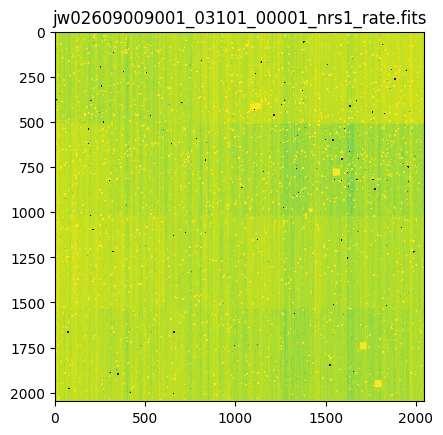

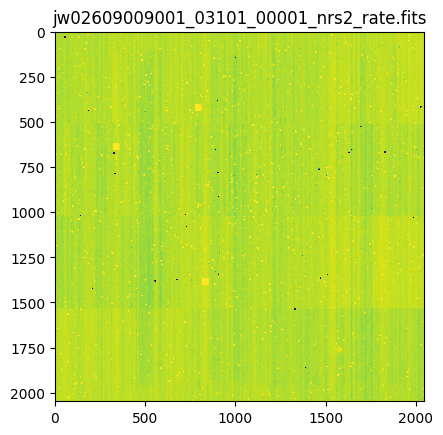

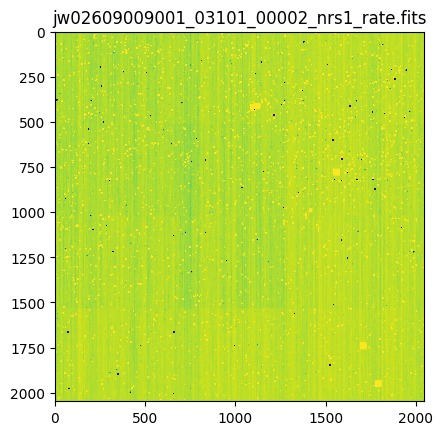

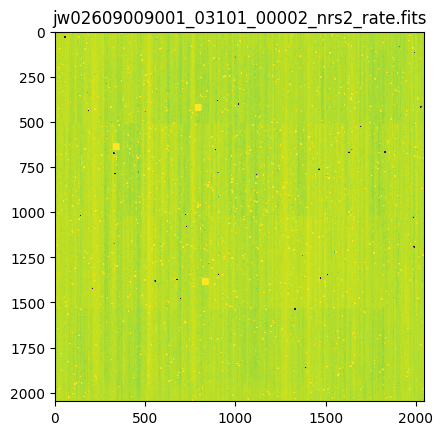

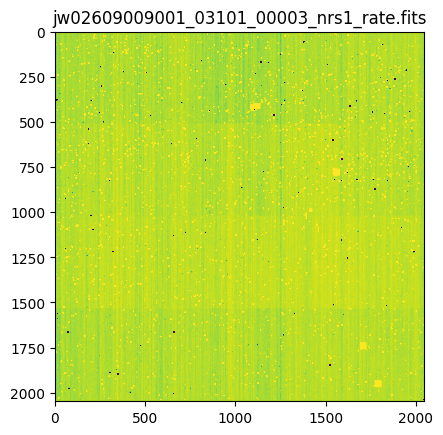

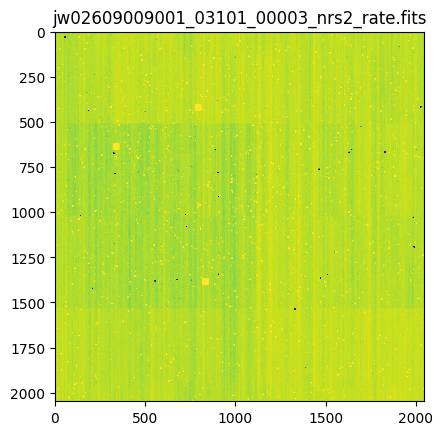

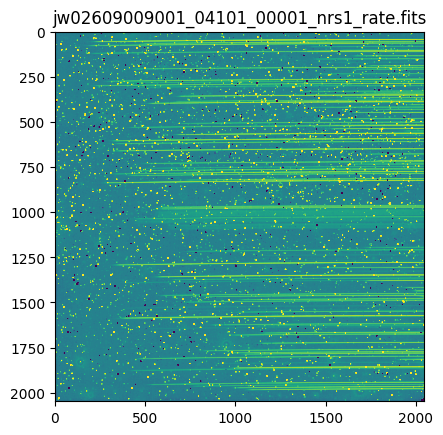

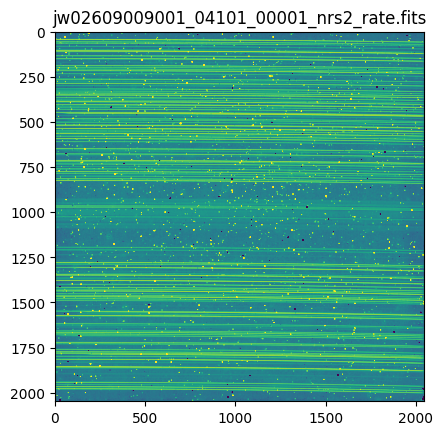

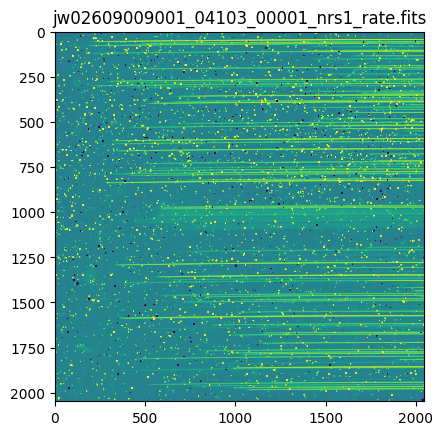

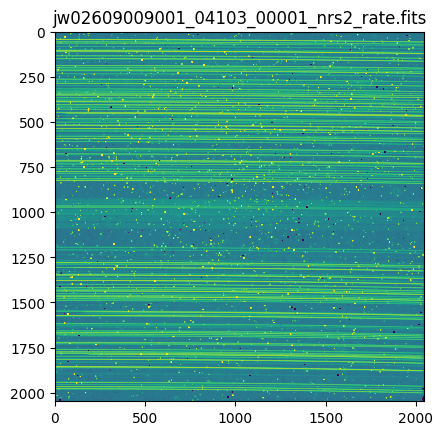

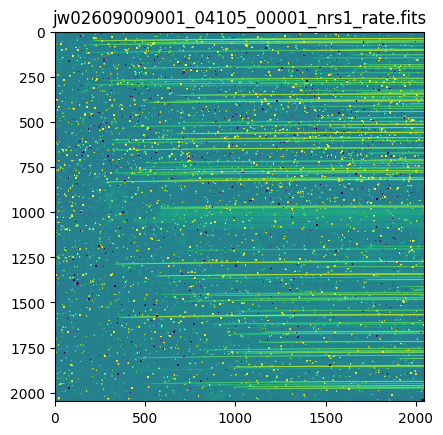

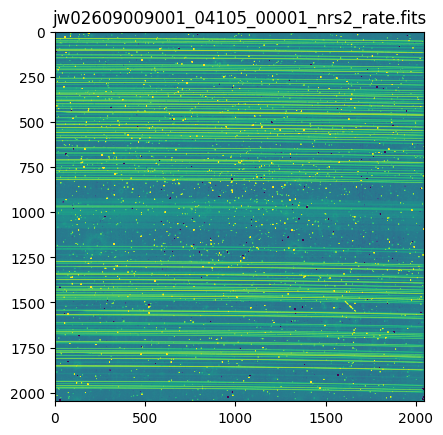

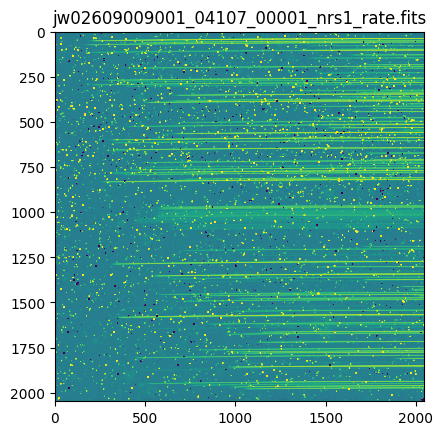

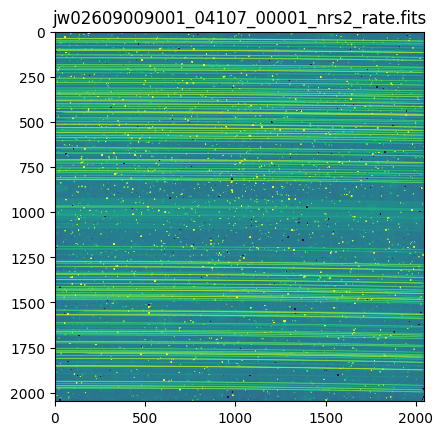

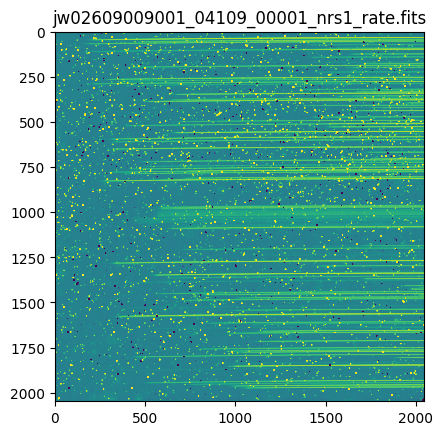

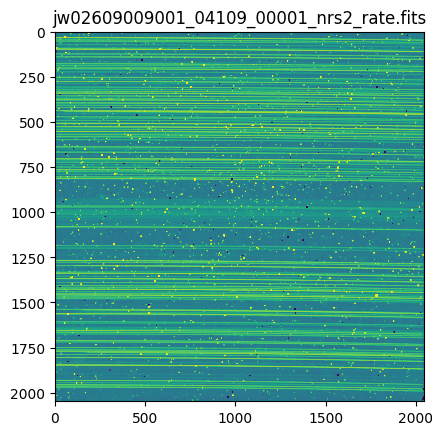

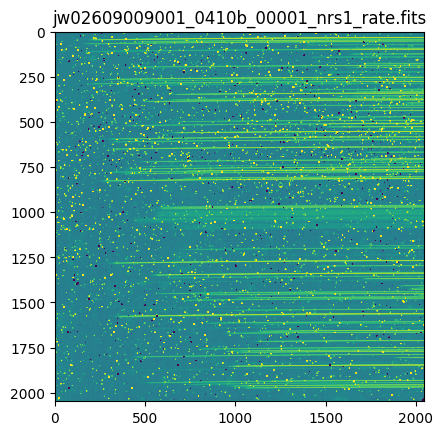

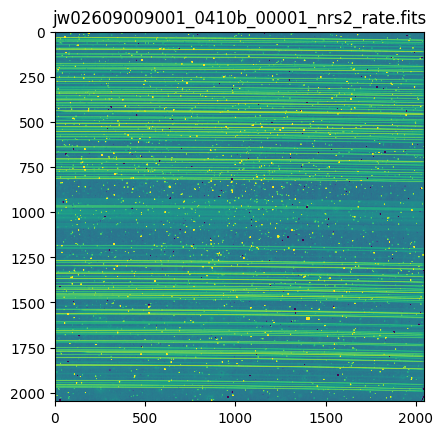

In [9]:
for dm in rate_dms:    
    plt.figure()
    visualization.imshow_norm(dm.data,
                              interval=visualization.PercentileInterval(99),
                              stretch=visualization.LogStretch(),
                             )
    plt.title(dm.meta.filename)

In [10]:
align_dms = [dm for dm in rate_dms if dm.meta.observation.visit_group=='03']

spec_dms = [dm for dm in rate_dms if dm.meta.observation.visit_group=='04']
spec_paths = [[p for p in paths_by_filetype['rate'] if p.name == dm.meta.filename][0] for dm in spec_dms]
spec_asns = [[f for f in p.parent.iterdir() if f.stem.endswith('asn')] for p in spec_paths]
spec_msas = [[f for f in p.parent.iterdir() if f.stem.endswith('msa')] for p in spec_paths]

In [25]:
spec2 = Spec2Pipeline()
spec2.save_results = False
spec2.output_dir = 'testout'

spec2.srctype.source_type = 'POINT'
spec2.flat_field.save_interpolated_flat = True

spec2.bkg_subtract.skip = True
spec2.resample_spec.skip = True
spec2.extract_1d.skip = True

result_default_width = spec2(spec_asns[0][0])

2023-02-07 21:48:50,328 - stpipe.Spec2Pipeline - INFO - Spec2Pipeline instance created.
2023-02-07 21:48:50,330 - stpipe.Spec2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2023-02-07 21:48:50,331 - stpipe.Spec2Pipeline.assign_wcs - INFO - AssignWcsStep instance created.
2023-02-07 21:48:50,332 - stpipe.Spec2Pipeline.imprint_subtract - INFO - ImprintStep instance created.
2023-02-07 21:48:50,333 - stpipe.Spec2Pipeline.msa_flagging - INFO - MSAFlagOpenStep instance created.
2023-02-07 21:48:50,334 - stpipe.Spec2Pipeline.extract_2d - INFO - Extract2dStep instance created.
2023-02-07 21:48:50,337 - stpipe.Spec2Pipeline.master_background_mos - INFO - MasterBackgroundMosStep instance created.
2023-02-07 21:48:50,338 - stpipe.Spec2Pipeline.master_background_mos.flat_field - INFO - FlatFieldStep instance created.
2023-02-07 21:48:50,339 - stpipe.Spec2Pipeline.master_background_mos.pathloss - INFO - PathLossStep instance created.
2023-02-07 21:48:50,340 - stpipe.Spec2Pipeline.

In [32]:
spec2 = Spec2Pipeline()
spec2.save_results = False
spec2.output_dir = 'testout'

spec2.srctype.source_type = 'POINT'
spec2.flat_field.save_interpolated_flat = True

spec2.bkg_subtract.skip = True
spec2.resample_spec.skip = True
spec2.extract_1d.skip = True

print(spec2.assign_wcs.slit_y_low, spec2.assign_wcs.slit_y_high)
spec2.assign_wcs.slit_y_high *= 2
spec2.assign_wcs.slit_y_low *= 2

result_double_width = spec2(spec_asns[0][0])

2023-02-07 21:59:56,946 - stpipe.Spec2Pipeline - INFO - Spec2Pipeline instance created.
2023-02-07 21:59:56,947 - stpipe.Spec2Pipeline.bkg_subtract - INFO - BackgroundStep instance created.
2023-02-07 21:59:56,948 - stpipe.Spec2Pipeline.assign_wcs - INFO - AssignWcsStep instance created.
2023-02-07 21:59:56,949 - stpipe.Spec2Pipeline.imprint_subtract - INFO - ImprintStep instance created.
2023-02-07 21:59:56,950 - stpipe.Spec2Pipeline.msa_flagging - INFO - MSAFlagOpenStep instance created.
2023-02-07 21:59:56,951 - stpipe.Spec2Pipeline.extract_2d - INFO - Extract2dStep instance created.
2023-02-07 21:59:56,953 - stpipe.Spec2Pipeline.master_background_mos - INFO - MasterBackgroundMosStep instance created.
2023-02-07 21:59:56,954 - stpipe.Spec2Pipeline.master_background_mos.flat_field - INFO - FlatFieldStep instance created.
2023-02-07 21:59:56,955 - stpipe.Spec2Pipeline.master_background_mos.pathloss - INFO - PathLossStep instance created.
2023-02-07 21:59:56,956 - stpipe.Spec2Pipeline.

-0.55 0.55


2023-02-07 22:00:00,429 - stpipe.Spec2Pipeline.assign_wcs - INFO - Step assign_wcs running with args (<ImageModel(2048, 2048) from jw02609009001_04101_00001_nrs1_rate.fits>,).
2023-02-07 22:00:00,430 - stpipe.Spec2Pipeline.assign_wcs - INFO - Step assign_wcs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': 'mastDownload/JWST/jw02609009001_04101_00001_nrs1', 'sip_approx': True, 'sip_max_pix_error': 0.1, 'sip_degree': None, 'sip_max_inv_pix_error': 0.1, 'sip_inv_degree': None, 'sip_npoints': 12, 'slit_y_low': -1.1, 'slit_y_high': 1.1}
2023-02-07 22:00:00,578 - stpipe.Spec2Pipeline.assign_wcs - INFO - Retrieving open MSA slitlets for msa_metadata_id = 1 and dither_index = 1
2023-02-07 22:00:00,900 - stpipe.Spec2Pipeline.assign_wcs - INFO - gwa_ytilt is 0.1332439180000042 deg
20

In [ ]:
spec2 = Spec2Pipeline()
spec2.save_results = False
spec2.output_dir = 'testout'

spec2.srctype.source_type = 'POINT'

spec2.bkg_subtract.skip = False
spec2.resample_spec.skip = True
spec2.extract_1d.skip = True

print(spec2.assign_wcs.slit_y_low, spec2.assign_wcs.slit_y_high)
spec2.assign_wcs.slit_y_high *= 2
spec2.assign_wcs.slit_y_low *= 2

result_double_width_bkgsub = spec2(spec_asns[0][0])

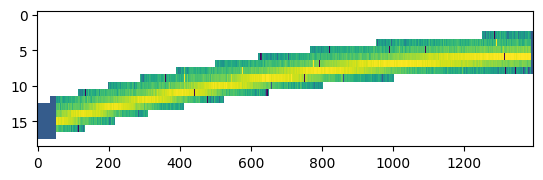

In [39]:
visualization.imshow_norm(result_default_width[0].slits[50].data, aspect=20,
                          interval=visualization.PercentileInterval(99),
                          stretch=visualization.LogStretch(),
                          interpolation='nearest'
                         );

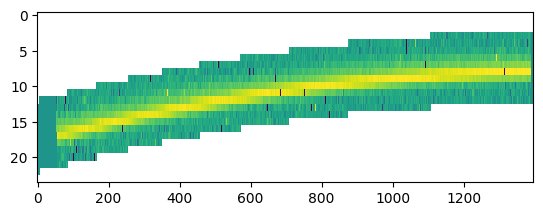

In [38]:
visualization.imshow_norm(result_double_width[0].slits[50].data, aspect=20,
                          interval=visualization.PercentileInterval(99),
                          stretch=visualization.LogStretch(),
                          interpolation='nearest'
                         );

Huzzah!  A much simpler-than-expected fix.

In [ ]:
visualization.imshow_norm(result_double_width_bkgsub[0].slits[50].data, aspect=20,
                          interval=visualization.PercentileInterval(99),
                          stretch=visualization.LogStretch(),
                          interpolation='nearest'
                         );